In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from eunjeon import Mecab
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('pre_origin_data3.csv', encoding='UTF-8')
data.head()

,label,content
0,3,우크라이나 침공을 감행한 블라디미르 푸틴 러시아 대통령은 18일(현지시각) 올라프 ...
1,3,다음 달부터는 태국에 입국할 때 코로나19 PCR(유전자증폭) 검사 음성 결과서를 ...
2,3,러시아 중앙은행이 지난달 환율 방어 차원에서 급격히 인상했던 기준금리를 연 20% ...
3,3,"라트비아, 에스토니아, 리투아니아 등 발트 3국이 모두 10명의 러시아 외교관을 추..."
4,6,대설이 예고된 가운데 행정안전부는 밤 9시 기준으로 경보 수준을 ‘관심’에서 ‘주의...


In [3]:
train_data, test_data = train_test_split(data, test_size = 0.2, stratify=data['label'],random_state = 42)

In [4]:
# 한글과 공백을 제외하고 모두 제거
train_data['content'] = train_data['content'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
train_data['content'].replace('', np.nan, inplace=True) # 공백은 Null 값으로 변경
print(train_data.isnull().sum())

label      0
content    0
dtype: int64


C:\Users\331\AppData\Local\Temp\ipykernel_18620\3428202444.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  train_data['content'] = train_data['content'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")


In [5]:
# 한글과 공백을 제외하고 모두 제거
test_data['content'] = test_data['content'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
test_data['content'].replace('', np.nan, inplace=True) # 공백은 Null 값으로 변경
print(test_data.isnull().sum())

label      0
content    0
dtype: int64


C:\Users\331\AppData\Local\Temp\ipykernel_18620\3030866086.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  test_data['content'] = test_data['content'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")


In [6]:
stopwords3 = ['도', '는', '다', '의', '가', '이', '은', '한', '에', '하', '고', '을', '를', '인', '듯', '과', '와', '네', '들', '듯',
             '지', '임', '게', '만',  '습니다','되', '음', '면', '했', '으로', '사진','해','로','등','에서','것','다고','라고', '중', '간',
            '일','출처','년','월','이날','그','뒤','연합뉴스', '좀', '하다','했습니다','하고'
            '할', '하는','오늘','말','된','대해','까지','시','씨','있는','관련','또','부터','대','자','위해',
            '에게','에는','이번','이어','내','됩니다','합니다','되는','때','명','지난해', '있', '적', '할',
            '입니다','됐', '었', '어', '면서', '연합', '뉴스', '받', '대한', '화', '않', '았','지난달',
            '겠', '지난', '나타났', '이나','아', '해야', '돼', '없', '다며', '며', '그러','달','데','해서','이런',
            '앞서','지금','라','같이','던','잘','더','나','측','다는','지만','천','성','는데요','거','죠','때문','좋','번','아요','라는','건', '싶', '어요', '저',
            '한다','는데','아니','한다','된다','처럼','그리고','못하','준','그러나','다면','그런데','분','많']

In [7]:
stopwords = ['도', '는', '다', '의', '가', '이', '은', '한', '에', '하', '고', '을', '를', '인', '듯', '과', '와', '네', '들', '듯',
             '지', '임', '게', '만',  '습니다','되', '음', '면', '했', '으로', '사진','해','로','등','에서','것','다고','라고', '중', '간',
            '원','억','일','조','수','위','출처','수','년','월','주','이날','그','뒤','연합뉴스', '좀', '하다','께서','했습니다','하고'
            '할', '하는','오늘','전','말','된','대해','까지','시','씨','있는','관련','또','됐습니다','부터','대','자','있다고','위해',
            '에게','에는','개','제','한다고','이번','이어','하지','될','내','됩니다','합니다','되는','보다','때','명','지난해', '있', '적', '할',
            '입니다', '밝혔', '기', '됐', '었', '어', '면서', '연합', '뉴스', '받', '대한', '화', '않', '았', '높', '세','사', '보', '지난달', '통해',
            '같', '겠', '지난', '나타났', '이나', '따라', '도록', '최근', '아', '해야', '돼', '없', '다며', '며', '그러','달','다면서','두','데','해서','이런',
            '앞서','지금','라','같이','던','잘','더','나','측','다는','지만','천','성','는데요','거','죠','때문','좋','번','아요','라는','건', '싶', '어요', '저',
            '한다','는데','아니','한다','된다','처럼','그리고','못하','준','그러나','다면','그런데','분','많']

In [8]:
stopwords2 = ['도', '는', '다', '의', '가', '이', '은', '한', '에', '하', '고', '을', '를', '인', '듯', '과', '와', '네', '들', '듯',
            '지', '임', '게', '만',  '습니다','되', '음', '면', '했', '으로', '사진','해','로','등','에서','것','다고','라고', '중', '간',
            '일','수','위','출처','수','년','월','주','이날','그','뒤','연합뉴스', '좀', '하다','께서','했습니다','하고'
            '할', '하는','오늘','전','말','된','대해','까지','시','씨','있는','관련','또','됐습니다','부터','대','자','있다고','위해',
            '에게','에는','개','제','한다고','이번','이어','하지','될','내','됩니다','합니다','되는','보다','때','명','지난해', '있', '적', '할',
            '입니다', '기', '됐', '었', '어', '면서', '연합', '뉴스', '받', '대한', '화', '않', '았', '높', '세','사', '보', '지난달', '통해',
            '같', '겠', '지난', '이나', '따라', '도록', '최근', '아', '해야', '돼', '없', '다며', '며', '그러','다면서','두','데','해서','이런',
            '앞서','지금','라','같이','던','잘','더','나','측','다는','지만','천','성','는데요','거','죠','때문','좋','번','아요','라는','건', '싶', '어요', '저',
            '한다','는데','아니','한다','된다','처럼','그리고','못하','준','그러나','다면','그런데','분','많','라며','위한','대해서','오후','그런','어제',
            '확인','열','나가','오전','이후','오','만들','모든','모두','이전','이제','직','신','한다는','한다며','는지','드리','대해선','께','왔','으면','다시',
            '기준','시작','실','놓','제일','그래서','나오','및','없이','동안','주요','하나',
            '인데','라도','였','쯤','뿐','거나','내일','이게','인가','냐는','아직','셨','조금','이미','제대로',
            '왜','님','어느','돼야','묻','자는','으로서','나왔','넘','재','반드시','려는','단','로서','엔','아마','냐',
            '또는','매우','저희','밝힌','스스로','못','우선','끝','올해','무엇','맡','글','위해서','어렵','온','으며','약','크','느냐','예','이른바',
            '누구','식','거든요','주년','더라도','각각','선','담','습니까','서로','스럽','보이','총','개월','전혀','한다면','충분히','양','얻','걸','자고','용','아야',
            '려고','든','다가','살','앞두','겸','물론','아닌','그때','대로','드린다고','을까','무슨','생','겁니다','아울러','천만','밝히','아주','지켜보','부족','삼','아닌가',
            '여러분','요','봅니다','줄','에선','듣','들어가','바로','또한','각','채','너무','니까','한다면서','완전히','드렸','갈','통해서','고자','최대','외','담겼','먼저',
            
            '하지만','그것','자기','믿','이름','물','정확','바라','홈페이지','영향','그건','이것','전반','이뤄질','철저','마친','마치','니','따르','하루','쪽','는다고','잘못',
            '란','쓰','늘','보인다고','초','밖에','해도','분명히','는가','로부터','꼭','봤','앤','론','려','축하','불가피','이르','그게','했으며','본','결코','조차','시켰',
            '못한','느냐고','시켜','언제','거기','나서','다르','곧','마다','만약','된다는','어떠','스','전환','정리','돼서','그러니까','려면','저녁','나온','제목','여기','쉽',
            '오히려','참','호','라면','드릴','냐고','자세','활용','동시','과연','바람직','갖추','몇','이뤄진','석','줬','냈','잇따라','반면','씩','질','입','감','긴','확고',
            '낮','난','결국','낸','현실','일희','으로부터','그거','만드','겪','부문','이루','상당히','소위','밤','줄이','밖','반복','알려진','로운','나올','거쳐','을지','내놨',
            '옳','따로','당연','된다며','인해','드린','바란다고','잖아요','마찬가지','모았','썼','잊','올렸','롭','적절','건지','어디','즉시','떠나','텐데','왜냐하면','딱',
            '못할','틀','쓸','한테','이어지','오래','지나','가까운','졌','나누','내렸','트','실제','본다고','층','그러면','이거','그럴','으니까','바꿔','구','지난번','안다며',
            '더니','그간','냐며','최대한','최악','왔다','다니','된다면','했으나','따라서','매년','해졌','져','앞둔','의해','오직','지난주','낼','늦','수록','든지','둔','모르',
            '취소','들어오','느냐며','주로','타','이걸','이건','남기','십시오','세요','어떻','십니까','하고','그걸','이기','자제','오랜','났','지났','세우','단독','각자','다를',
            '끌','나섰','덜','날짜','불과','전날','으신','꾸준히','됐으며','셈','가졌','미뤄','으시','느냐면서','넓','될지','뭘','해요','아닙니다','스러운','넣','이어졌','쏟',
            '정확히','읽','떼','되게','십','저런','붙','너무나','에요','짜','니다','이라든가','즈','드러냈','관계없이','는다며','로써','드러나','나타날','약간','므로','끼리',
            '은데','이렇','네요','의해서','돼요','입니까','그랬','잃','다름','연간','이래','겁니까','그럼에도','냐면','다니까요','잖','걸로','진다며','이라든지','혹시','알렸',
            '라든지','냐면서','떠올렸','놓여','며칠','안다면서','놓인','내려','나중','라기','갑니다','더라','버렸','될까','신다면','진짜','그래야','으십니까','겠어요','으냐',
            '건가요','주일','리라고','으므로','건데']

considering = ['원','억','조','나타났','밝혔','달','덧붙였','전했','불','바','현','함','치','지속','갖','된다고','그렇게','해당','라면서','보입니다','찾','비','처음','그렇',
               '많이','사용','시키','사항','최고','잡','출연','더욱','깊','속','뭐','못했','느냐는','따른','보여','그동안','전해졌','측면']

In [9]:
mecab = Mecab() 

train_data['tokenized'] = train_data['content'].apply(mecab.morphs)
train_data['tokenized'] = train_data['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])
test_data['tokenized'] = test_data['content'].apply(mecab.morphs)
test_data['tokenized'] = test_data['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])

In [10]:
economy = np.hstack(test_data[test_data.label == 7]['tokenized'].values)

In [11]:
from collections import Counter
economy_count = Counter(economy)
print(economy_count.most_common())

[('선수', 32), ('팀', 32), ('올림픽', 21), ('시즌', 21), ('경기', 20), ('농구', 19), ('위원', 18), ('광고', 18), ('구단', 16), ('기록', 15), ('대표', 15), ('심석희', 15), ('예상', 15), ('진종오', 14), ('강', 14), ('이대명', 13), ('단', 13), ('가상', 13), ('프로', 12), ('사격', 11), ('대회', 11), ('최준용', 11), ('정해영', 11), ('투수', 11), ('홈런', 11), ('한국', 10), ('마음', 10), ('생각', 10), ('장', 10), ('우승', 10), ('분석', 10), ('파리', 9), ('종오', 9), ('만큼', 9), ('였', 9), ('최', 9), ('메달', 8), ('금메달', 8), ('최고', 8), ('인터뷰', 8), ('형', 8), ('축구', 8), ('마무리', 8), ('잡', 8), ('해설', 8), ('이재원', 8), ('타격', 8), ('오리온', 8), ('이원', 8), ('광저우', 7), ('권', 7), ('으면', 7), ('아시안', 7), ('게임', 7), ('당시', 7), ('시상식', 7), ('입', 7), ('가장', 7), ('세이브', 7), ('야구', 7), ('관', 6), ('왕', 6), ('걸', 6), ('모두', 6), ('든', 6), ('얼굴', 6), ('이제', 6), ('서', 6), ('역시', 6), ('많이', 6), ('선배', 6), ('다른', 6), ('팬', 6), ('코치', 6), ('타', 6), ('계획', 6), ('뿐', 6), ('폼', 6), ('배트', 6), ('이광용', 6), ('전력', 6), ('운영', 6), ('경우', 6), ('인수', 6), ('물론', 5), ('연속', 5), ('출전', 5), ('노력', 5), ('마

In [12]:
X_train = train_data['tokenized'].values
y_train = train_data['label'].values
X_test= test_data['tokenized'].values
y_test = test_data['label'].values

In [13]:
akc = np.hstack(train_data['tokenized'].values)
akcc = Counter(akc)
print(akcc)

Counter({'대통령': 4661, '정부': 3724, '러시아': 3578, '북한': 3081, '국민': 3007, '코로나': 2872, '미국': 2745, '서울': 2510, '권': 2396, '수사': 2383, '검찰': 2376, '우크라': 2353, '장관': 2298, '후보': 2267, '조사': 2238, '지원': 2237, '설명': 2131, '우리': 2127, '안': 2103, '지역': 2046, '라며': 1962, '위원회': 1911, '한국': 1903, '의원': 1890, '당선인': 1860, '민주당': 1773, '시간': 1749, '국가': 1729, '이후': 1727, '국회': 1713, '중국': 1692, '계획': 1653, '현지': 1631, '경제': 1628, '상황': 1621, '위한': 1618, '회의': 1609, '여': 1609, '예정': 1606, '경찰': 1599, '위원장': 1589, '차': 1575, '혐의': 1574, '발생': 1567, '가능': 1563, '정책': 1548, '대표': 1541, '이상': 1532, '함께': 1512, '문제': 1507, '기준': 1499, '경우': 1477, '제공': 1453, '시장': 1428, '필요': 1411, '보도': 1407, '진행': 1397, '김': 1396, '가운데': 1393, '검사': 1393, '미': 1367, '확진': 1364, '강조': 1360, '전했': 1352, '통신': 1345, '올해': 1340, '사회': 1323, '확인': 1322, '윤': 1321, '발표': 1306, '기업': 1272, '사업': 1242, '모두': 1240, '결과': 1222, '덧붙였': 1219, '일본': 1209, '오': 1204, '불': 1203, '현재': 1203, '약': 1189, '대상': 1178, '안전': 1174, '증가': 1

D:\anaconda3\envs\craw\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

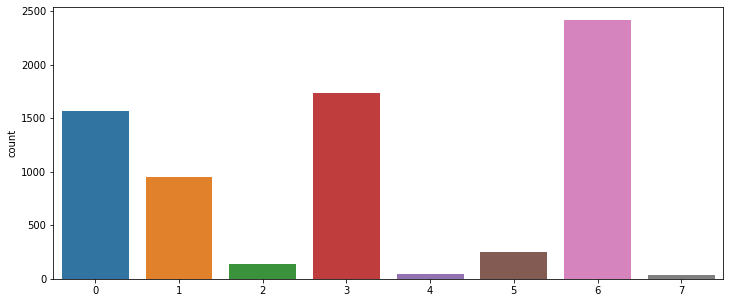

In [14]:
import seaborn as sns
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(12,5)
sns.countplot(y_train)

In [15]:
unique_elements, counts_elements = np.unique(y_train, return_counts=True)
print("각 레이블에 대한 빈도수:")
print(np.asarray((unique_elements, counts_elements)))

각 레이블에 대한 빈도수:
[[   0    1    2    3    4    5    6    7]
 [1566  949  141 1737   46  246 2416   34]]


In [16]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [17]:
threshold = 2
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('빈도수 2 이하 단어 수:',rare_freq)
print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

빈도수 2 이하 단어 수: 11943
단어 집합(vocabulary)의 크기 : 34666
등장 빈도가 1번 이하인 희귀 단어의 수: 11943
단어 집합에서 희귀 단어의 비율: 34.45162406969365
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 1.2509505464463702


In [18]:
# 전체 단어 개수 중 빈도수 2이하인 단어 개수는 제거.
# 0번 패딩 토큰과 1번 OOV 토큰을 고려하여 +2
vocab_size = total_cnt - rare_cnt + 2
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 22725


In [19]:
tokenizer = Tokenizer(vocab_size, oov_token = 'OOV') 
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

뉴스의 최대 길이 : 1910
뉴스의 평균 길이 : 133.80714786264892


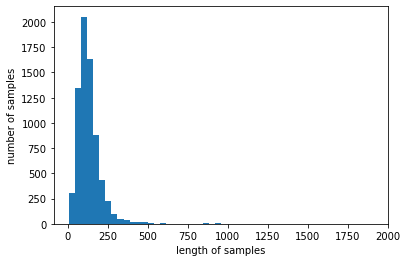

In [20]:
print('뉴스의 최대 길이 :',max(len(content) for content in X_train))
print('뉴스의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(content) for content in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [21]:
def below_threshold_len(max_len, nested_list):
  count = 0
  for sentence in nested_list:
    if(len(sentence) <= max_len):
        count = count + 1
  print('전체 뉴스 데이터 중 길이가 %s 이하인 데이터의 비율: %s'%(max_len, (count / len(nested_list))*100))

In [22]:
max_len = 500
below_threshold_len(max_len, X_train)

전체 뉴스 데이터 중 길이가 500 이하인 데이터의 비율: 99.48142957252978


In [23]:
max_len = 500
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

In [24]:
from keras.utils.np_utils import to_categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [25]:
import re
from tensorflow.keras.layers import Embedding, Dense, LSTM, Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow import keras

In [26]:
embedding_dim = 100
hidden_units = 128
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(Bidirectional(LSTM(hidden_units))) # Bidirectional LSTM을 사용
model.add(Dense(8, activation='softmax'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('re_BiLSTM_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
opt = keras.optimizers.Adam(learning_rate=0.001)
#opt = keras.optimizers.RMSprop(learning_rate=0.001)

model.compile(optimizer=opt, loss='CategoricalCrossentropy', metrics=['acc'])
history = model.fit(X_train, y_train_cat, epochs=20, callbacks=[es, mc], batch_size=128, validation_split=0.2)

Epoch 1/20
45/45 [==============================] - ETA: 0s - loss: 1.5347 - acc: 0.4149
Epoch 1: val_acc improved from -inf to 0.59285, saving model to re_BiLSTM_model.h5
45/45 [==============================] - 23s 121ms/step - loss: 1.5347 - acc: 0.4149 - val_loss: 1.1123 - val_acc: 0.5929
Epoch 2/20
45/45 [==============================] - ETA: 0s - loss: 0.9186 - acc: 0.6901
Epoch 2: val_acc improved from 0.59285 to 0.75333, saving model to re_BiLSTM_model.h5
45/45 [==============================] - 2s 50ms/step - loss: 0.9186 - acc: 0.6901 - val_loss: 0.7968 - val_acc: 0.7533
Epoch 3/20
45/45 [==============================] - ETA: 0s - loss: 0.5277 - acc: 0.8497
Epoch 3: val_acc improved from 0.75333 to 0.75823, saving model to re_BiLSTM_model.h5
45/45 [==============================] - 2s 49ms/step - loss: 0.5277 - acc: 0.8497 - val_loss: 0.7017 - val_acc: 0.7582
Epoch 4/20
45/45 [==============================] - ETA: 0s - loss: 0.3352 - acc: 0.8965
Epoch 4: val_acc improved f

In [27]:
loaded_model = load_model('re_BiLSTM_model.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test_cat)[1]))

56/56 [==============================] - 3s 20ms/step - loss: 0.5162 - acc: 0.8621

 테스트 정확도: 0.8621


In [28]:
rounded_labels=np.argmax(y_test_cat, axis=1)
rounded_labels

array([3, 6, 1, ..., 3, 6, 1], dtype=int64)

In [29]:
from sklearn.metrics import classification_report
print(classification_report(rounded_labels, np.argmax(model.predict(X_test), axis=-1)))

56/56 [==============================] - 2s 16ms/step
              precision    recall  f1-score   support

           0       0.87      0.88      0.87       392
           1       0.81      0.81      0.81       237
           2       0.28      0.31      0.30        35
           3       0.91      0.96      0.94       435
           4       0.67      0.17      0.27        12
           5       0.47      0.77      0.59        61
           6       0.94      0.86      0.90       604
           7       0.00      0.00      0.00         8

    accuracy                           0.86      1784
   macro avg       0.62      0.60      0.58      1784
weighted avg       0.87      0.86      0.86      1784



D:\anaconda3\envs\craw\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda3\envs\craw\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda3\envs\craw\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


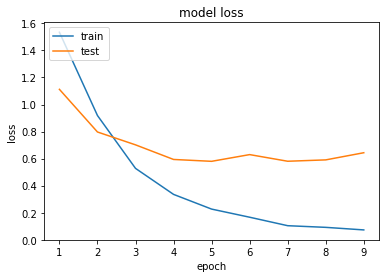

In [30]:
epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [46]:
def sentiment_predict(new_sentence):
    new_sentence = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','', new_sentence)
    new_sentence = mecab.morphs(new_sentence) # 토큰화
    new_sentence = [word for word in new_sentence if not word in stopwords] # 불용어 제거
    encoded = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
    pad_new = pad_sequences(encoded, maxlen = 500) # 패딩
    pre_cat = np.argmax(loaded_model.predict(pad_new), axis=-1) # 예측
    socre = np.max(loaded_model.predict(pad_new))
    pre_value = pre_cat[0]
    if pre_value == 0:
        print("해당 뉴스 기사 카테고리는 %.5f의 확률로 '정치'로 예측됩니다."%socre)
    elif pre_value == 1:
        print("해당 뉴스 기사 카테고리는 %.5f의 확률로 '경제'로 예측됩니다."%socre)
    elif pre_value == 2:
        print("해당 뉴스 기사 카테고리는 %.5f의 확률로 '과학'으로 예측됩니다."%socre)
    elif pre_value == 3:
        print("해당 뉴스 기사 카테고리는 %.5f의 확률로 '국제'로 예측됩니다."%socre)
    elif pre_value == 4:
        print("해당 뉴스 기사 카테고리는 %.5f의 확률로 '대북'으로 예측됩니다."%socre)
    elif pre_value == 5:
        print("해당 뉴스 기사 카테고리는 %.5f의 확률로 '문화'로 예측됩니다."%socre)
    elif pre_value == 6:
        print("해당 뉴스 기사 카테고리는 %.5f의 확률로 '사회'로 예측됩니다."%socre)
    elif pre_value == 7:
        print("해당 뉴스 기사 카테고리는 %.5f의 확률로 '스포츠'로 예측됩니다."%socre)


In [47]:
sample_a = '문재인 대통령은 “개인 안전 장비 확충과 교육훈련 지원에 더욱 힘을 기울여 의용소방대의 활동 기반을 강화하고 복리를 증진해 나가겠다”고 밝혔습니다.문 대통령은 ‘제1회 의용소방대의 날’인 오늘(19일) SNS에 올린 메시지에서 “보람과 긍지로 따뜻한 이웃이 되어 온 대원들이 참으로 자랑스럽다”면서 이같이 말했습니다.문 대통령은 “세종대왕은 금화도감을 설치해 화재를 상설 관리했고, 통행금지 시간인 밤 10시가 지난 뒤에도 불을 끌 수 있도록 신패를 만들었다”며 “의용소방대의 역사는 매우 오래됐다”고 설명했습니다.그러면서 “1915년부터 활동기록을 남긴 지금의 의용소방대는 1958년 소방법이 제정돼 공식적인 민간소방관 자격을 갖게 됐다”고 말했습니다.문 대통령은 “의용소방대는 광역과 기초자치단체별로 전국에 3천921곳이 구성됐고, 안전관리와 긴급구호, 자원봉사 등 폭넓은 활동을 펼치고 있다”며 “경북과 강원 대형산불 현장에 5천 명이 넘는 대원이 지원에 나섰다”고 떠올렸습니다.이어 “정부는 의용소방대원들의 자긍심을 높이고 숭고한 정신을 기리고자 매년 3월 19일을 의용소방대의 날로 명명하고 법정기념일로 정했다”며 “의용소방대법을 개정해 재해보상과 포상에서 실질적 예우도 가능해졌다”고 강조했습니다.문 대통령은 “의용소방대의 날을 맞아 고귀한 봉사 정신을 함께 나눌 수 있게 돼 기쁘다”며 “우리의 이웃으로 국민의 안전과 생명을 지켜온 전국의 10만 의용소방대원 한 분 한 분께 축하와 존경의 말씀을 드린다”고 덧붙였습니다.'
sample_b = '온라인 쇼핑 등이 늘어나면서 지난해 경제활동인구 기준으로 1인당 2.84일에 한 번꼴로 택배를 이용한 것으로 나타났습니다. 국가물류통합정보센터가 한국통합물류협회 통계를 인용해 내놓은 자료에 따르면 지난해 총 택배 물량은 36억2천967만 개로 전년보다 7.6% 증가했습니다.택배물량은 2019년 9.7% 증가한 데 이어 2020년에는 20.9%, 작년에는 7.6% 늘어나는 등 증가세를 이어가고 있습니다. 경제활동인구를 기준으로 1인당 택배 이용 횟수는 연 128.4회로, 전년 대비 6.4회 늘었고 평균 2.84일에 한 번꼴로 택배를 이용한 셈입니다. 지난해 국내 택배시장의 총매출액은 8조5천800억 원으로, 전년보다 14.6% 증가했습니다.'
sample_c = '과학기술정보통신부가 민간 분야 사이버위기 경보 단계를 종전 ‘관심’에서 ‘주의’로 한 단계 상향 조정한다고 오늘(21일) 밝혔습니다.  이는 우크라이나 사태 관련해 사이버전이 확산하고 국내 기업의 랜섬웨어 및 정보유출 등 사고 발생 등 국내외적으로 사이버 위협 우려가 커짐에 따른 선제적 조치라고 과기정통부는 설명했습니다.  사이버위기 경보 단계는 가장 낮은 ‘정상’부터 시작해 ‘관심-주의-경계-심각’ 순으로 높아집니다.  과기정통부는 경보 단계를 ‘주의’로 올림에 따라 민·관·군 협동으로 사이버 위헙 정보 공유 등 24시간 비상대응체계를 강화합니다.  또, 관련 기관과 기업은 정보시스템 취약 부분에 대한 사전 점검을 진행하고 사이버위협 모니터링을 보다 면밀히 진행합니다.  과기정통부는 사회적 이슈 등을 악용한 스미싱에 주의할 것을 국민들에게 알리는 한편, 피해 발생 시 ☎ 118에 즉시 신고해줄 것을 당부했습니다.'
sample_d = '우크라이나 침공을 감행한 블라디미르 푸틴 러시아 대통령은 18일(현지시각) 올라프 숄츠 독일 총리와 전화 통화를 하고 우크라이나가 평화협상을 지연시키고 있다고 주장했습니다. 로이터 통신과 AFP 통신 등 외신에 따르면 크렘린궁은 이날 푸틴 대통령이 숄츠 총리와의 통화에서 “키이우 정권(우크라이나)이 갈수록 비현실적인 제안을 내놓으면서 협상 절차를 지연시키기 위해 가능한 모든 방안을 시도하고 있다고 언급했다”고 전했습니다. 크렘린궁은 “그렇더라도, 러시아 측은 원칙에 입각한 접근 방식에 따라 해결책을 계속해서 모색할 준비가 돼 있다”고 밝혔습니다. 한편, 이날 드미트리 페스코프 크렘린궁 대변인은 조 바이든 미국 대통령이 지난 16일 푸틴 대통령을 ‘전범’으로 공개적으로 규정한 데 이어 17일 ‘살인 독재자’, ‘폭력배’ 등으로 칭하며 발언 수위를 높인 것을 “인신공격”이라고 비판하기도 했습니다.'
sample_e = '최근 북한의 강경 행보는 방금 보신 군사 분야에만 국한된 것은 아닙니다.금강산의 우리 측 시설인 해금강호텔을 철거하는 정황도 포착됐습니다. 2019년 금강산의 남측 시설을 모두 철거하라는 김정은 위원장 지시가 있었는데요. 코로나 19를 구실로 그동안 연기하다가 아무런 통보 없이 이행에 들어간 것으로 보입니다. 북한은 남북 화해 상징이던 금강산 시설까지 철거하면서 정권 교체기 남한 정부를 압박하려고 애쓰는 모습입니다. 이번 주 클로즈업 북한에선 민족의 명산인 금강산의 어제와 오늘을 짚어보겠습니다.   [리포트]1998년 11월 동해항. 2만8천 톤의 ‘현대 금강호’가 실향민과 관광객 천4백여 명을 싣고 북한 장전항으로 떠났다.  ["대한민국 만세!"] 분단 반세기, 금단의 땅으로 여겨졌던 금강산의 문이 열리는 순간이었다. 구룡폭포와 만물상, 해금강 등 금강산의 절경들이 남측 관광객들을 맞았다. 분단과 전쟁의 상처로 얼룩진 한반도에 금강산은 평화와 화해의 상징으로 다가왔다. 그러나 금강산관광이 10년 넘게 중단되면서 우리 측이 투자, 건설한 시설물들도 고스란히 방치되고 있다. 급기야 2019년 10월, 김정은 북한 국무위원장은 금강산 일대의 남측 시설을 들어내라고 지시했다. [조선중앙TV : "볼품없이 들어앉아 명산의 경관을 손상시키는 너절한 시설물들을 싹 다 드러내고 누구나 조선의 명산을 보러 왔다가 조선의 건축을 볼 수 있게 우리 식으로 처음부터 새롭게 다시 꾸립시다."] 그리고 지난 12일과 17일, ‘미국의 소리’ 방송은 금강산 해금강호텔이 철거되고 있다면서 옥상 일부가 뜯긴 민간 위성사진을 공개했다. 우리 정부 당국도 철거 정황을 확인했지만, 북한의 공식 통보는 없었다며 신중한 입장을 취하고 있다. 그러면서도 금강산 관광 관련 사안은 반드시 남북 간 협의가 필요하다는 것을 거듭 강조했다. [이종주/통일부 대변인 : "정부는 금강산 관광과 관련하여 우리 기업의 재산권을 침해하는 북측의 일방적인 조치가 있어서는 안 되며 모든 사안은 남북 간 협의를 통해 해결해 나가야 한다는 입장에서 일관되게 대처해 오고 있다는 점을 말씀드립니다."]'
sample_f = '‘국보’로 지정된 불교 문화재 2점이 경매에 나왔습니다. 국가지정문화재 국보가 경매에 출품되는 건 처음입니다. 미술품 경매회사 케이옥션은 오는 27일(목) 진행되는 올해 첫 메이저 경매에 국보 ‘금동삼존불감’과 국보 ‘계미명금동삼존불입상’이 출품된다고 오늘(14일) 밝혔습니다. 이 유물들은 간송미술관 소장품입니다. 11~12세기에 제작된 거로 추정되는 국보 ‘금동삼존불감’은 사찰 내부에 조성된 불전을 그대로 축소한 것으로, 높이는 18cm입니다. 흔히 원불(願佛)이라 해서 개인이 사찰 밖에서 예불을 드리기 위해 만든 겁니다. 전체적인 보존 상태가 좋고 고려 시대 또는 그 이전의 목조건축 양식과 조각 수법을 보여주는 귀중한 예라는 점에서 가치가 큰 것으로 평가됩니다. 함께 출품된 국보 ‘계미명금동삼존불입상’은 6세기 초반 동아시아에서 호신불로 유행한 금동삼존불상으로, 높이는 17.7cm입니다. 하나의 광배 안에 주불상과 양쪽으로 협시보살이 나란히 새겨진 일광삼존(一光三尊) 양식으로, 광배 뒷면에 새겨진 글에 의해 백제 위덕왕 10년(563)에 만든 것으로 추정됩니다. 재정난 타개를 위해 2020년부터 소장 유물을 경매에 내놓고 있는 간송미술문화재단은 오늘(14일) 입장문을 내 “구조조정을 위한 소장품의 매각이라는 어려운 결정을 다시 할 수밖에 없게 되어 송구한 마음이 크다.”면서 “앞으로 간송이 나아갈 방향에 대한 많은 고민 끝에 간송의 미래를 위해 어렵게 내린 결정이니 너그러이 혜량해 주시기 바란다.”고 전했습니다. 간송미술관은 앞서 2020년 5월 소장하고 있는 불상 2점을 경매에 내놓았다가 거센 논란에 휩싸였습니다. 당시에 출품된 불상 2점은 경매에서 유찰됐고, 이후 국립중앙박물관이 구매해 소장하고 있습니다. 국가지정문화재는 해외에는 판매할 수 없지만, 국내에서는 문화재청에 신고하면 매매할 수 있습니다.간송미술관은 일제강점기에 중요한 문화재를 대거 수집해 우리 문화유산을 지킨 사업가 간송 전형필(1906~1962)이 세운 우리나라 최초의 사립미술관으로, 국보 훈민정음 해례본과 신윤복의 미인도 등 중요 문화재를 많이 소장하고 있습니다.'
sample_g = '대설이 예고된 가운데 행정안전부는 밤 9시 기준으로 경보 수준을 ‘관심’에서 ‘주의’로 상향 조정하고 중앙재난안전대책본부 비상근무 1단계를 가동했습니다.  행안부는 오늘(18일) 밤부터 내일(19일) 오후까지 중부지방을 중심으로 많은 눈이 내릴 것으로 내다봤습니다.  또, 행안부는 주말 동안 유동인구 증가에 대비해 고속도로, 국도, 주요 간선 도로를 중심으로 제설작업을 하고 작업자 안전에 유의할 것을 요청했습니다.  이어, 주요 도로 작업 뒤 시가지 이면도로, 인도, 농촌 지역 마을안길 등을 점검하고 조치해달라고 당부했습니다.'
sample_h = 'LG 트윈스는 당연히 4강 후보 중 한 팀이다." KBS N 신임 해설위원 유희관의 말이다.  LG가 지난해 우승팀 KT 등과 함께 정상을 다툴 것이라고 예상하는 전문가들이 많다. 전문가들은 이구동성으로 LG의 투수력이 탄탄하다고 분석한다. LG는 2021시즌 후 기존 외국인 투수 케이시 켈리와 재계약했다. 또 다른 외국인 투수 앤드루 수아레스는 일본 프로야구 야쿠르트 스왈로스로 이적했지만, 팀 내부에선 별다른 걱정이 없는 분위기다. 메이저리그 출신 아담 플럿코가 위력적인 공을 구사하고 있기 때문이다. 지난해까지 메이저리그 볼티모어에서 뛰었던 플럿코는 빅리그 통산 88경기에서 14승 14패, 평균자책점(ERA) 5.39를 기록했다.  14일 시범경기에선 3이닝 1안타 6탈삼진 무실점을 기록했다. 당시 플럿코는 까다로운 타자 이용규를 3구 삼진으로 돌려세운 것은 물론 송성문과 이정후까지 삼진으로 잡아냈다. 그리고 LG가 믿는 또 한 명의 투수는 2020 신인 드래프트 당시 1차 지명의 영광을 안은 21살의 우완 이민호다. LG는 20일 창원NC파크에서 열린 NC 다이노스와의 시범경기에서 선발 이민호의 역투를 앞세워 5대 2 승리를 거뒀다. 이민호는 4와 2/3이닝 동안 1실점하며 개막에 맞춰 몸 상태를 끌어올리고 있다. 직구 구속은 벌써 시속 150km 가까이 나왔다. 지난 2년간 각각 8승과 4승, 총 12승을 기록했던 이민호는 올 시즌 생애 첫 10승에 도전한다.  프로에 입문했던 2020년에는 이닝 제한을 두고 97과 3분의 2이닝만을 소화했기 때문에 어깨도 싱싱하다.  지난해 115이닝으로 이닝 소화를 늘렸지만, 규정 이닝인 144이닝과는 차이가 난다. 올해는 첫 규정 이닝 돌파도 당연한 목표이다.  LG 영건 이민호가 고척 돔구장에서 인터뷰하고 있다. 다음은 이민호와 1문 1답이다. - 시범경기 컨디션이 좋아 보인다? 겨울 동안 준비해 왔던 투구를 시험해 보고 있다. 시범경기지만 결과도 좋았고 다행이다. - 스트라이크 비율이 높아졌나? 올해 스트라이크 존이 높고 넓어졌다. 원래 스트라이크 존대로 심판들이 잡아준다고 해서 기분도 좋고 자신감도 좋아졌다. 저는 구위가 좋으니까 내 공을 믿고 있다. 자신 있게 던지면서 "칠테면 쳐봐라." 하고 마음먹고 있다. 한결 던지기가 편하다. - 올 시즌 목표는? 안 아프고 한 시즌 내내 로테이션 소화하며 계속 던지는 것이다. 안 아프다는 조건 속에 규정 이닝도 넘기고 싶다. 많이 던지고 싶다. 아직 승수는 모르겠다. - 잠실 3루 더그아웃 시설도 좋아졌는데? 한 번만 지나가 봤다. 잠실 원정 라커룸을 공사해서 정말 좋아졌더라. 지난해보다 너무 좋아졌고, 쉴 수 있는 공간도 넓어졌고 겉으로 보기에도 너무 좋다. - LG 팬들에게 한마디 올 시즌은 개막전부터 관중이 100% 들어오길 기대하고 있다. 잠실구장 만원 관중 앞에서 던져보고 싶다. 우리 팀이 최대한 높은 자리(1위)에 있을 것이다. 그 목표를 향해 던질 것이다. 팬들이 많이 오신다면 더욱 힘이 날 것이다. LG 팬들을 위해 정말 온 힘을 다해 던지고 싶다.'

In [48]:
sentiment_predict(sample_a)
sentiment_predict(sample_b)
sentiment_predict(sample_c)
sentiment_predict(sample_d)
sentiment_predict(sample_e)
sentiment_predict(sample_f)
sentiment_predict(sample_g)
sentiment_predict(sample_h)

1/1 [==============================] - 0s 22ms/step
해당 뉴스 기사 카테고리는 0.32753의 확률로 '정치'로 예측됩니다.
1/1 [==============================] - 0s 26ms/step
해당 뉴스 기사 카테고리는 0.98055의 확률로 '경제'로 예측됩니다.
1/1 [==============================] - 0s 62ms/step
해당 뉴스 기사 카테고리는 0.42817의 확률로 '과학'으로 예측됩니다.
1/1 [==============================] - 0s 28ms/step
해당 뉴스 기사 카테고리는 0.99316의 확률로 '국제'로 예측됩니다.
1/1 [==============================] - 0s 33ms/step
해당 뉴스 기사 카테고리는 0.98321의 확률로 '정치'로 예측됩니다.
1/1 [==============================] - 0s 27ms/step
해당 뉴스 기사 카테고리는 0.80687의 확률로 '문화'로 예측됩니다.
1/1 [==============================] - 0s 24ms/step
해당 뉴스 기사 카테고리는 0.98804의 확률로 '사회'로 예측됩니다.
1/1 [==============================] - 0s 24ms/step
해당 뉴스 기사 카테고리는 0.58192의 확률로 '문화'로 예측됩니다.
